In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.tree import plot_tree

In [2]:
dataset_liver=pd.read_csv("./data/indian_liver_patient.csv")

In [3]:
dataset_liver.shape

(583, 11)

In [4]:
df=dataset_liver

In [5]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

'Age': سن افراد.

'Gender':جنسیت افراد.

'Total_Bilirubin':آزمایش بیلی روبین میزان بیلی روبین در بدن را نشان می‌دهد. گاهی کبد نمی‌تواند بیلی روبین بدن را پردازش کند. این امر در نتیجه افزایش بیلی روبین، انسداد یا التهاب کبد رخ می‌دهد. به مجموع بیلی‌روبین در خون، بیلی‌روبین کلی (بیلی‌روبین تام ) گفته می‌شود. آزمایش Total Bilirubin در واقع تست جامع بیلی‌روبین است که میزان Bilirubin کلی بدن(مستقیم و غیر مستقیم) را در خون اندازه‌گیری می‌کند.پس افزایش آن باعث بیماری کبدی می‌شود.

'Direct_Bilirubin':در کبد، بیلی‌روبین به شکلی تبدیل می‌شود که بدن می‌تواند آن را به طور موثری دفع کند. این بیلی روبین اصطلاحا با نام بیلی‌روبین مستقیم (مزدوج) یا bilirubin direct معرفی می‌شود. این ماده از کبد به روده کوچک منتقل خواهد شد.

'Alkaline_Phosphotase':. تست آلکالین فسفاتاز (ALP) برای کمک به تشخیص بیماری کبد یا اختلالات استخوانی استفاده می‌شود. در بیماری‌های مرتبط با کبد سلول‌های آسیب دیده کبدی، مقادیر بیشتری ALP را در خون آزاد می‌کنند.

'Alamine_Aminotransferase':این آزمایش سطح آنزیم آلانین آمینوترانسفراز (ALT) خون را اندازه‌گیری می‌کند. تست آلانین آمینوترانسفراز یک آزمایش مفید در جهت تشخیص آسیب‌های کبدی می‌باشد. هر چه این مقدار بیش‌تر شود نشان دهنده‌ی بیماری‌های کبدی در فرد است.

'Aspartate_Aminotransferase':آزمایش AST خون یا آسپارتات آمینوترانسفراز (Aspartate Aminotransferase ) یک آزمایش خون است که آسیب کبدی را بررسی می کند.به طور معمول ، سطح AST در خون شما کم است. هنگامی که کبد شما آسیب ببیند ، AST بیشتری را در خون شما قرار می دهد و سطح شما افزایش می یابد.ممکن است افزایش آن به دلیل سرطان‌های دیگر باشد به همین دلیل پزشکان آن را به‌همراه ALT انجام میدهند.


'Total_Protiens':برای میزان پروتئین کل خون که شامل پروتئین آلبومین و گلوبولین است, تجویز می‌ٰشود.کاهش آن نشاندهنده‌ی بیماری کبدی است.

'Albumin':آلبومین به عنوان یکی از مهم‌ترین پروتئین‌های پلاسما خون یاد می‌شود.غیرطبیعی بودن جواب تست آلبومین می‌تواند نشانه‌هایی از بیماری‌های کلیوی و کبدی باشد. پایین بودن سطح آلبومین می‌تواند نشانه‌ای از بروز برخی از بیماری‌های و اختلالات کبدی باشد.

'Albumin_and_Globulin_Ratio':کاهش نسبت (گلوبولین/آلبومین) نشاندهنده‌ی بیماری های کبدی است.

'Dataset':این متغیر دو مقدار یک و دو میگیرد که مقدار یک نشاندهنده‌ی این است که فرد دارای بیماری کبد است ومقدار دو نشاندهنده‌ی این است که فردسالم است 

# Data processing

In [8]:
df = df.rename(columns={'Total_Bilirubin': 'T_Bil','Direct_Bilirubin': 'D_Bil', 'Alkaline_Phosphotase': 'ALP','Alamine_Aminotransferase':'ALT','Aspartate_Aminotransferase':'AST','Total_Protiens':'Total_pro','Albumin':'Alb','Albumin_and_Globulin_Ratio':'A/G'})

برای اختصار نام ستون‌ها را تغییر می‌دهیم

In [9]:
df

,Age,Gender,T_Bil,D_Bil,ALP,ALT,AST,Total_pro,Alb,A/G,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   T_Bil      583 non-null    float64
 3   D_Bil      583 non-null    float64
 4   ALP        583 non-null    int64  
 5   ALT        583 non-null    int64  
 6   AST        583 non-null    int64  
 7   Total_pro  583 non-null    float64
 8   Alb        583 non-null    float64
 9   A/G        579 non-null    float64
 10  Dataset    583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


همه ستون ها درقالب داده درست است(مثل سن به صورت عدد صحیح است)

In [11]:
df.isnull().sum()

Age          0
Gender       0
T_Bil        0
D_Bil        0
ALP          0
ALT          0
AST          0
Total_pro    0
Alb          0
A/G          4
Dataset      0
dtype: int64

۴ سطر از ستون مربوط به  A/G به صورت null است ما چون Alb و Total_pro مربوط به آن را داریم می‌توانیم به راحتی آن مقادیر را به‌دست آوریم.

In [12]:
df[df['A/G'].isnull()].index.tolist()

[209, 241, 253, 312]

In [13]:
mask1=pd.isna(df['A/G'])
df.loc[mask1,'A/G']=np.divide(df['Alb'], df['Total_pro']-df['Alb'])

In [14]:
df.isnull().sum()

Age          0
Gender       0
T_Bil        0
D_Bil        0
ALP          0
ALT          0
AST          0
Total_pro    0
Alb          0
A/G          0
Dataset      0
dtype: int64

In [15]:
df['Gender']= pd.get_dummies(df[['Gender']])['Gender_Male']
df = df.rename(columns={'Gender': 'Gender_Male'})

تعریف متغیر دامی برای جنسیت

In [16]:
mask = df['Dataset'] ==2
df.loc[mask,'Dataset']=0

با این دستور به کسانی که دارای بیماری کبد هستند مقدار ۱ و به کسانی که سالم هستند مقدار صفر نسبت داده می‌شود

In [17]:
df

,Age,Gender_Male,T_Bil,D_Bil,ALP,ALT,AST,Total_pro,Alb,A/G,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [18]:
x=df.drop(["Dataset"],axis=1)
y=df['Dataset']

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)# (x-min) / (max-min)
df=pd.DataFrame(x,columns=df.columns.drop(['Dataset']))
df=df.join(y)

داده‌ها را نرمال‌سازی می‌کنیم.

In [20]:
df

,Age,Gender_Male,T_Bil,D_Bil,ALP,ALT,AST,Total_pro,Alb,A/G,Dataset
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1.0,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028,0
579,0.418605,1.0,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320,1
580,0.558140,1.0,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280,1
581,0.313953,1.0,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280,1


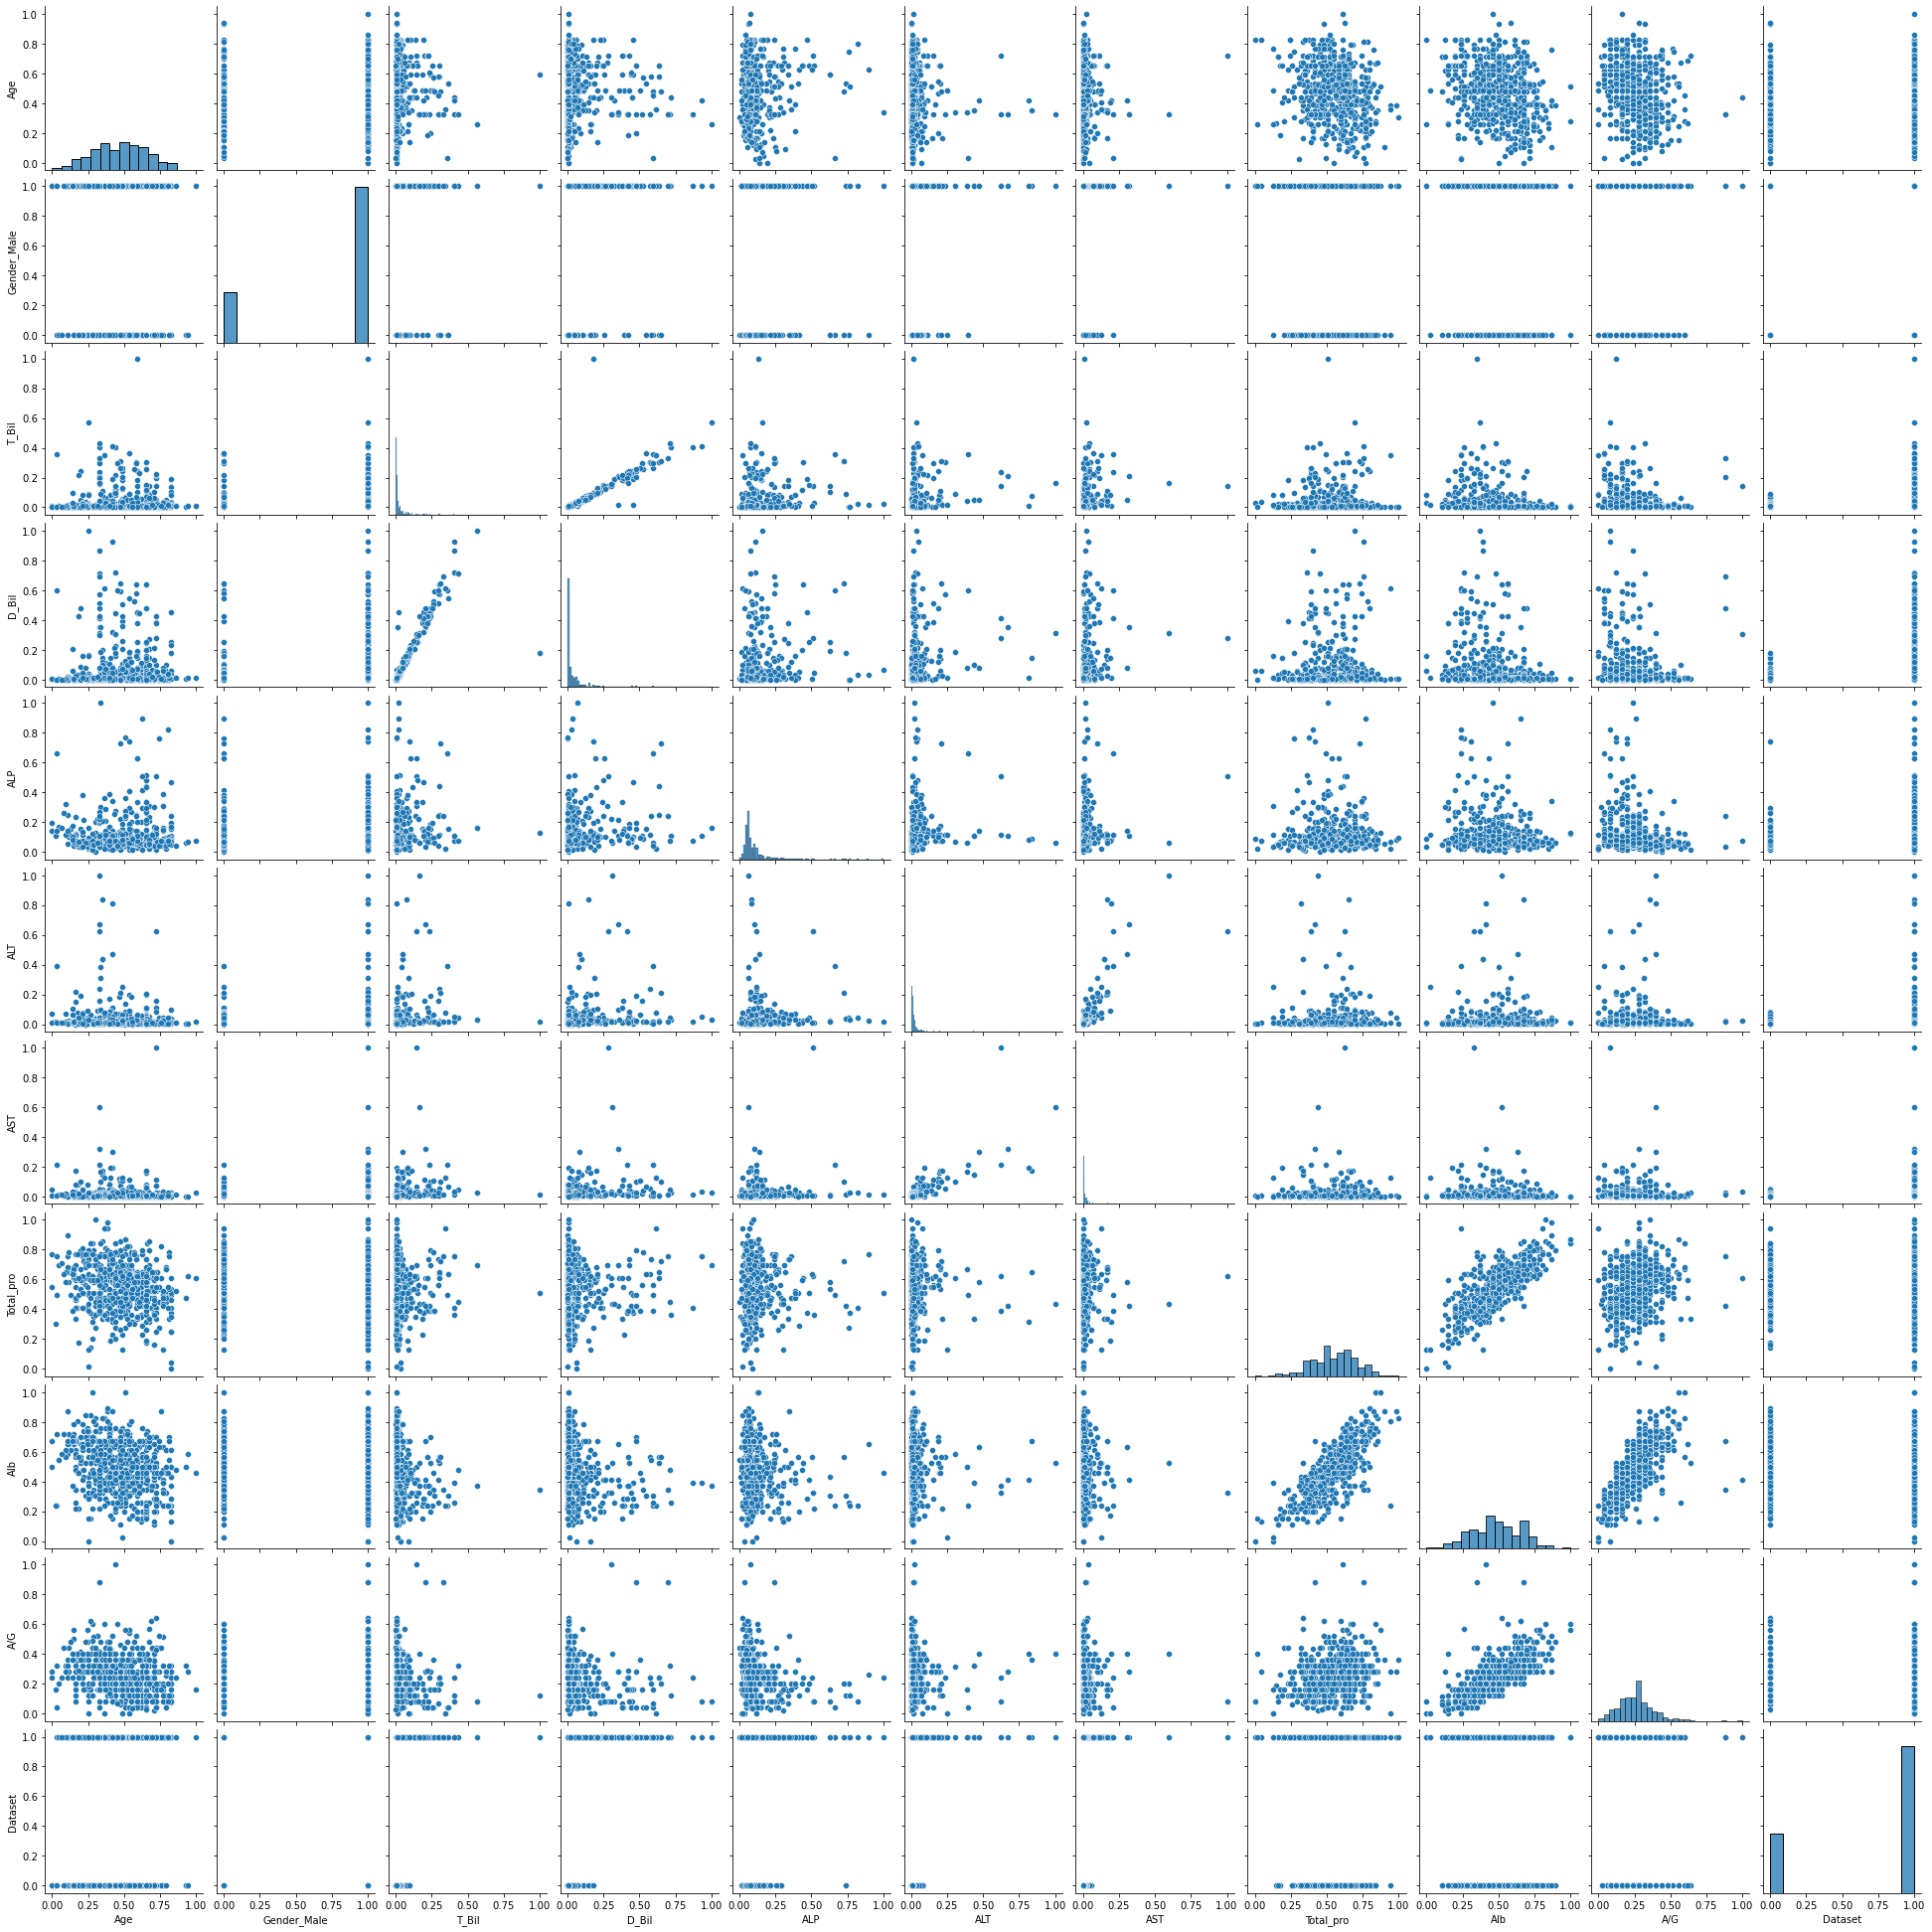

In [21]:
import seaborn as sb
sb.pairplot(df)

In [22]:
df.groupby("Dataset")["Dataset"].count()

Dataset
0    167
1    416
Name: Dataset, dtype: int64

406 تا از داده‌ها را بیماران تشکیل داده‌اند.

In [23]:
df.groupby("Gender_Male")["Gender_Male"].count()

Gender_Male
0.0    142
1.0    441
Name: Gender_Male, dtype: int64

434 تا از داده‌ها را مرد تشکیل داده‌اند.

In [24]:
df.groupby(["Gender_Male","Dataset"])["Dataset"].count()

Gender_Male  Dataset
0.0          0           50
             1           92
1.0          0          117
             1          324
Name: Dataset, dtype: int64

In [25]:
324/(324+117)

0.7346938775510204

In [26]:
92/(50+92)

0.647887323943662

همانطور که پیداست در این دیتاست مدها بیشتر به بیماری کبد مبتلا هستند.

In [27]:
df.groupby(["Gender_Male", "Dataset"])["ALT"].mean()

Gender_Male  Dataset
0.0          0          0.009920
             1          0.028922
1.0          0          0.012726
             1          0.049601
Name: ALT, dtype: float64

میانگین میزان ALT در خون را بر اساس جنسیت و وجود بیماری آنها نشان می‌دهد.همانطور که می‌بینید به‌طور طبیعی ALT در مردها بیشتر زنان است

In [28]:
import pandas as pd
df.corr()

,Age,Gender_Male,T_Bil,D_Bil,ALP,ALT,AST,Total_pro,Alb,A/G,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.217909,0.137351
Gender_Male,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.008400,0.082416
T_Bil,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.207360,0.220208
D_Bil,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.201315,0.246046
ALP,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.236023,0.184866
ALT,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.003996,0.163416
AST,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.071064,0.151934
Total_pro,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.236079,-0.035008
Alb,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.690168,-0.161388
A/G,-0.217909,-0.008400,-0.207360,-0.201315,-0.236023,-0.003996,-0.071064,0.236079,0.690168,1.000000,-0.164313


در اینجا کوریلیشن همه‌ی متغیرها را نسبت به‌هم نشان می‌دهد.

# decision-tree

In [29]:
y=df['Dataset']
x=df.drop(["Dataset"],axis=1)
x_score=[]

In [30]:
k_range=range(1,100)
k_score=[]
for i in k_range:
    clf = DecisionTreeClassifier(max_depth=i+1,random_state=0)#max_depth= The maximum depth of the tree
    score = cross_val_score(clf, x, y, cv=5, scoring='accuracy')#sklearn.metrics.get_scorer_names()
    k_score.append(score.mean())
best=np.argmax(k_score)
print(np.argmax(k_score))


1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [32]:
clf = DecisionTreeClassifier(max_depth=3)#max_depth= The maximum depth of the tree
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [33]:
text_representation = export_text(clf)
print(text_representation)

|--- feature_4 <= 0.07
|   |--- feature_6 <= 0.00
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|   |--- feature_6 >  0.00
|   |   |--- feature_3 <= 0.05
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.05
|   |   |   |--- class: 1
|--- feature_4 >  0.07
|   |--- feature_0 <= 0.16
|   |   |--- feature_6 <= 0.01
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.01
|   |   |   |--- class: 1
|   |--- feature_0 >  0.16
|   |   |--- feature_5 <= 0.00
|   |   |   |--- class: 0
|   |   |--- feature_5 >  0.00
|   |   |   |--- class: 1



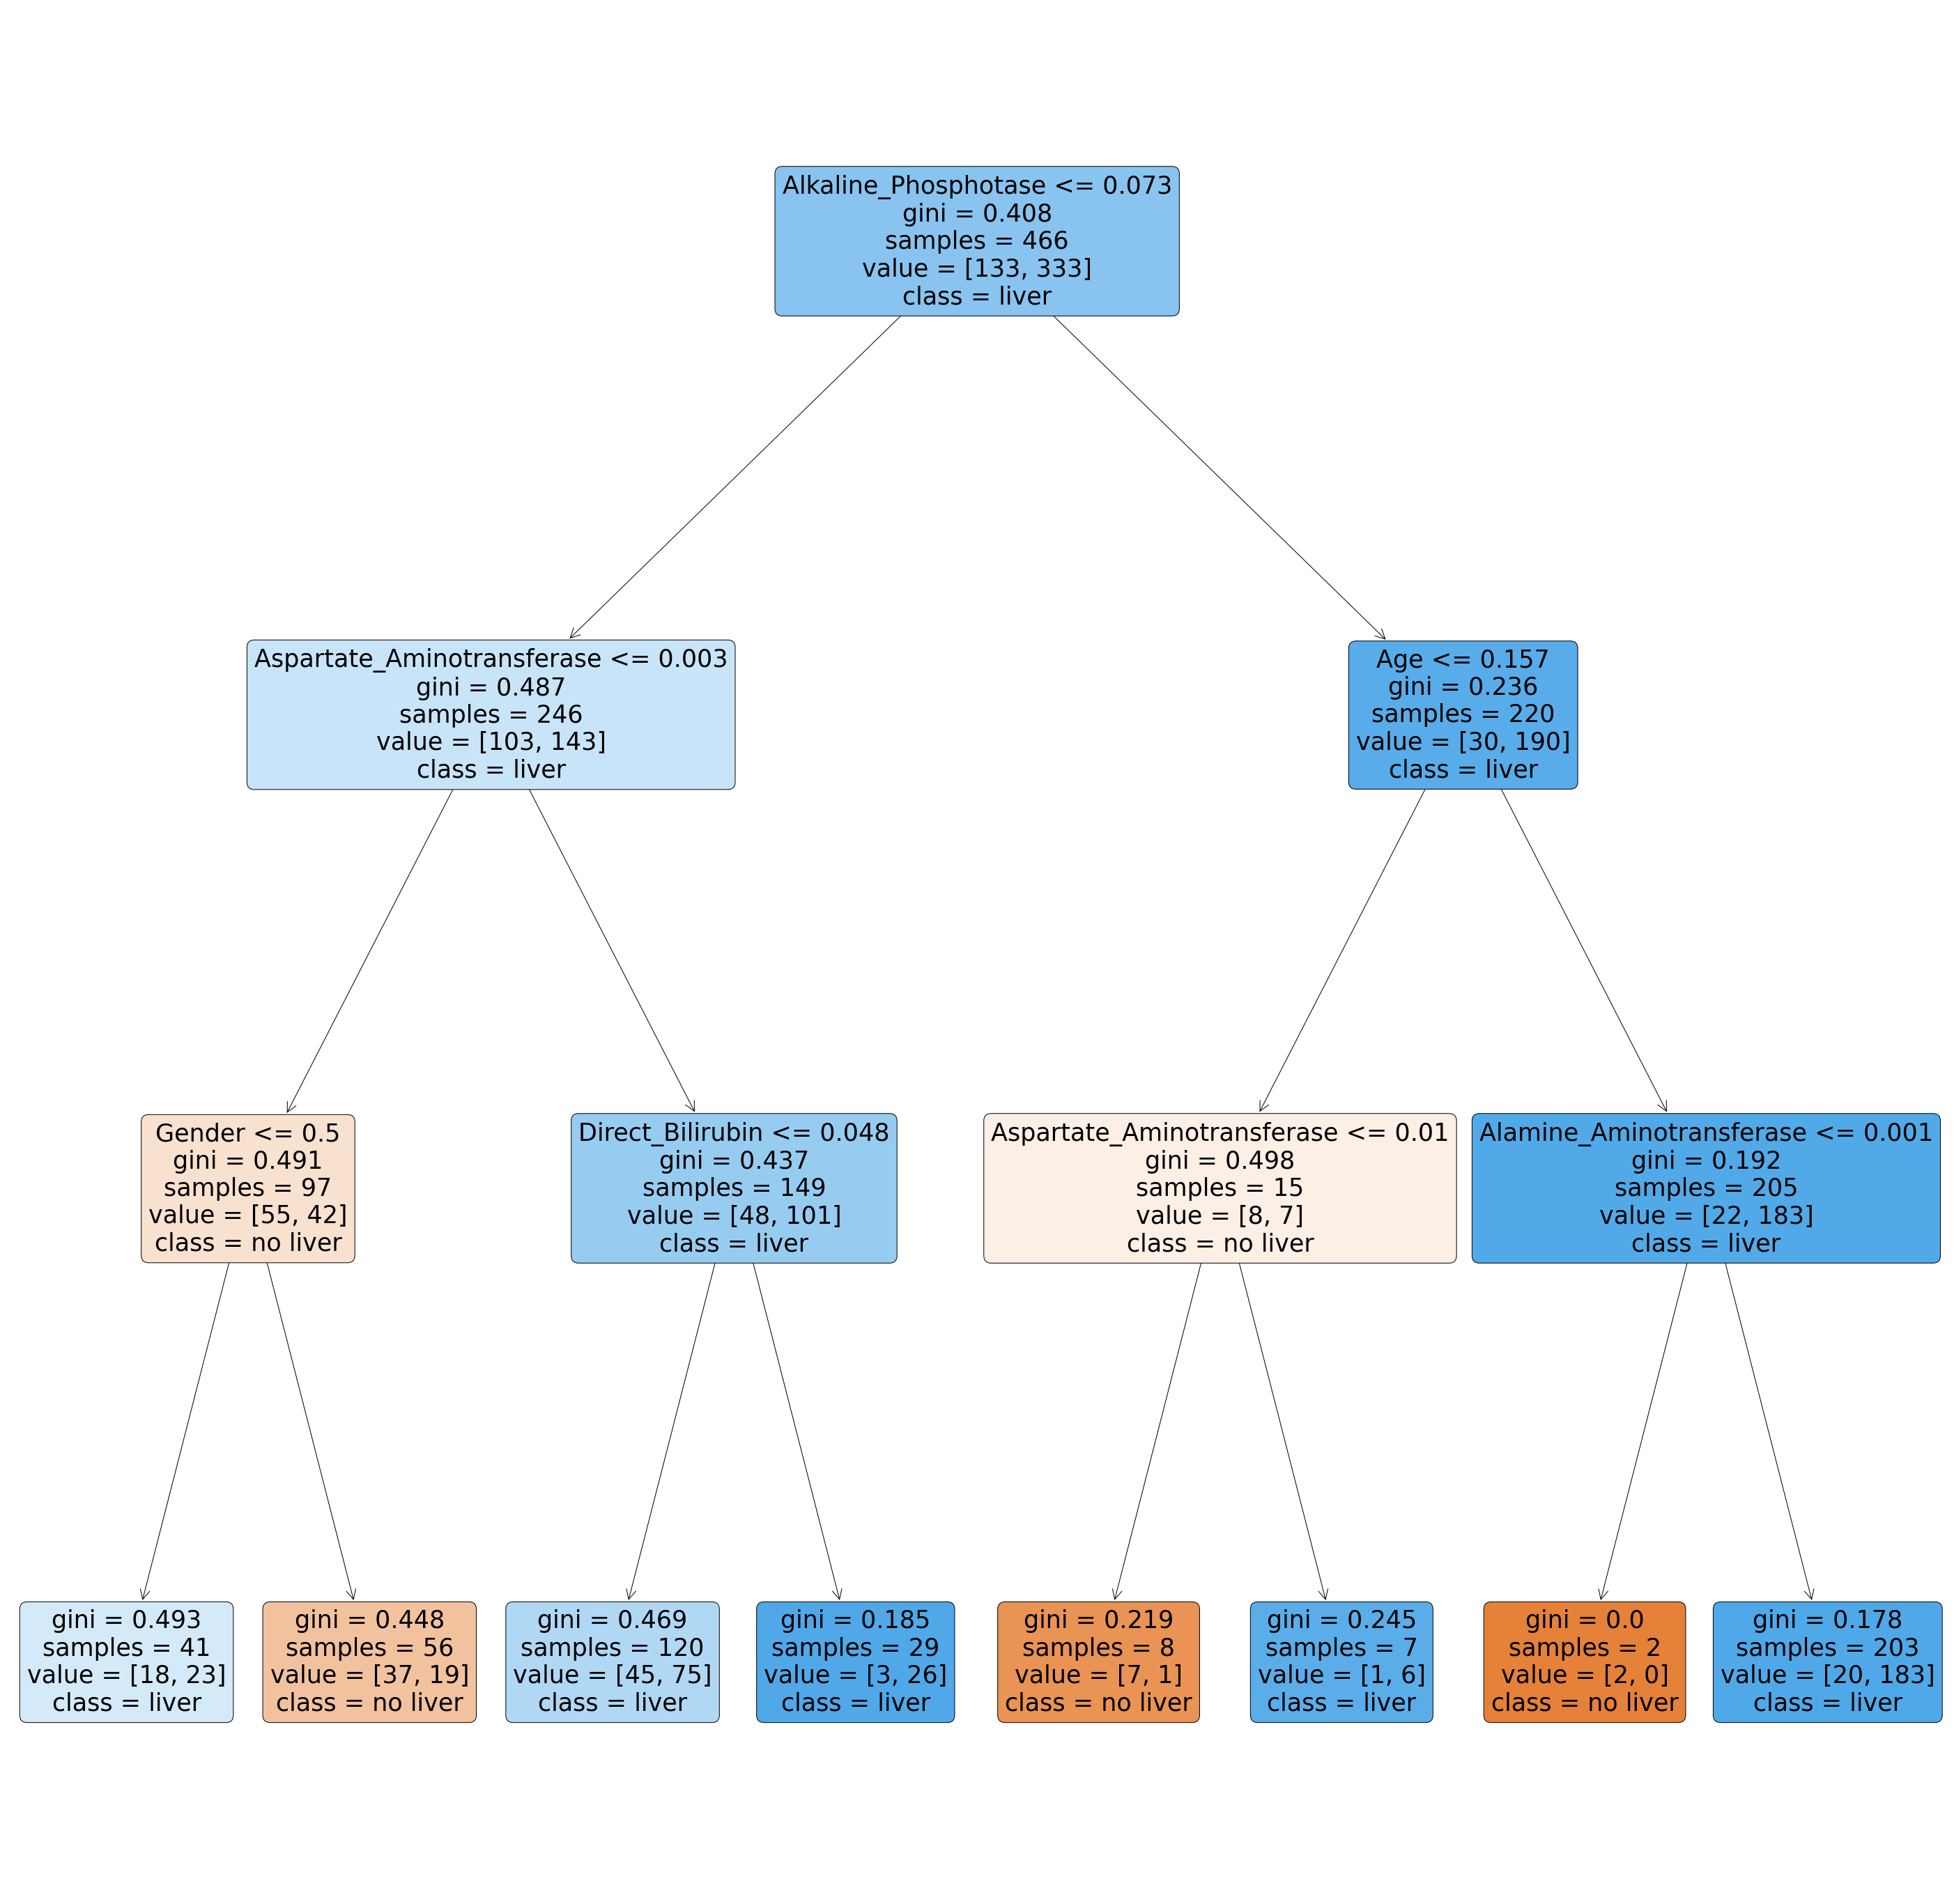

In [34]:
plt.figure(figsize=(50, 50))
graph =plot_tree(clf, 
                   feature_names=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                'Albumin_and_Globulin_Ratio'], 
                   rounded=True,
                   class_names=['no liver','liver'],
                   fontsize=35,
                   filled=True)

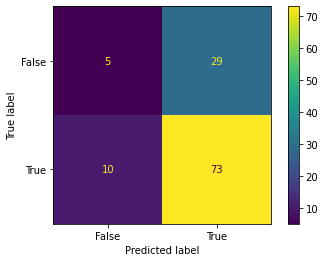

F1_score= 0.7891891891891892


In [35]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
F1_score = metrics.f1_score(y_test, y_pred)
print('F1_score=',F1_score)
#F1_score=2*((Precision * Sensitivity) / (Precision + Sensitivity))
#Specificity=True Negative / (True Negative + False Positive)
#Precision=True Positive / (True Positive + False Positive)

In [36]:
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(X_train[['D_Bil','ALT']].values,y_train)
y_pred=clf.predict(X_test[['D_Bil','ALT']].values)

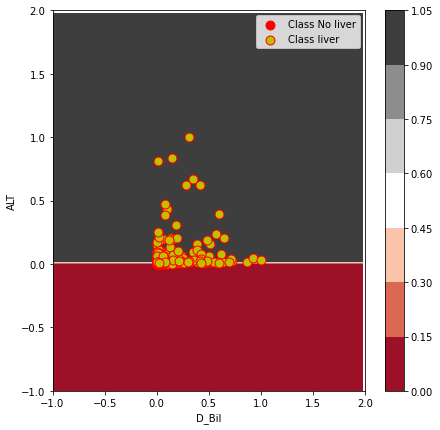

In [37]:
plt.figure(figsize=(7, 7))
x_min = x['D_Bil'].min() - 1
x_max = x['D_Bil'].max() + 1
y_min = x['ALT'].min() - 1
y_max = x['ALT'].max() + 1
L1=x['D_Bil'].to_numpy()
L2= x['ALT'].to_numpy()


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap='RdGy')
plt.colorbar()

for i, n, c in zip(range(2),["No liver","liver"], "ry"):
    idx = np.where(y == i)
    plt.scatter(L1[idx], L2[idx],c=c,  s=80, edgecolor='r',label="Class %s" % n)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='best')
plt.xlabel('D_Bil')
plt.ylabel('ALT');

In [38]:
clf.tree_.node_count

13

In [39]:
clf.max_depth

3

In [40]:
clf.tree_.max_n_classes

2

In [41]:
clf.tree_.n_features

2